In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?
Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

The columns are:

Price: suggested retail price of the used 2005 GM car in excellent condition.
Mileage: number of miles the car has been driven
Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
Type: body type such as sedan, coupe, etc.
Cylinder: number of cylinders in the engine
Liter: a more specific measure of engine size
Doors: number of doors
Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
Leather: indicator variable representing whether the car has leather seats (1 = leather)


# Tasks, Part 1

In [5]:
df = pd.read_csv("car_data.csv")

In [7]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [8]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

# 1.Find the linear regression equation for mileage vs price.

In [14]:
X=df['Mileage']        
y=df['Price']        

In [28]:
mileage = X.values.reshape(-1, 1)
price = y.values.reshape(-1, 1)

In [30]:
model = LinearRegression()
model.fit(mileage, price)

LinearRegression()

In [31]:
slope = model.coef_[0][0]               
intercept = model.intercept_[0] 

In [34]:
equation = f"y = {slope:.2f}x + {intercept:.2f}"
print("Linear Regression Equation:", equation)

Linear Regression Equation: y = -0.17x + 24764.56


# 2.Chart the original data and the equation on the chart.

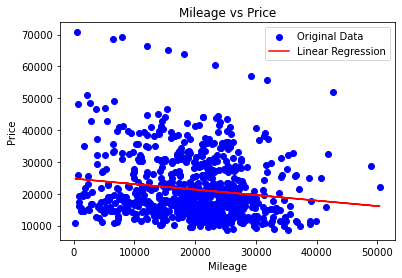

In [37]:
predicted_prices = model.predict(mileage)
plt.scatter(mileage, price, color='blue', label='Original Data')
plt.plot(mileage, predicted_prices, color='red', label='Linear Regression')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.legend()
plt.show()

# 3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [38]:
r2_score = model.score(mileage, price)
print("R2 Score:", r2_score)

R2 Score: 0.02046344732348926


# here we didn't get a strong correlation

# Tasks, Part 2

# 1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [40]:
features = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
price = df['Price']

In [41]:
model = LinearRegression()
model.fit(features, price)

LinearRegression()

In [42]:
coefficients = model.coef_
intercept = model.intercept_

In [44]:
equation = f"y = {slope:.2f}x + {intercept:.2f}"
print("Linear Regression Equation:", equation)

Linear Regression Equation: y = -0.17x + 6758.76


# 2.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [45]:
predicted_prices = model.predict(features)
r2_score = model.score(features, price)
print("R2 Score:", r2_score)

R2 Score: 0.446264353672838


# 3.Find the combination of the factors that is the best predictor for price.

In [46]:
feature_names = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
best_predictor = feature_names[coefficients.argmax()]
print("Best Predictor for Price:", best_predictor)

Best Predictor for Price: Cruise


# Tasks, Hard Mode

# 1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features = data[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make', 'Model', 'Type']]
price = data['Price']

categorical_features = ['Make', 'Model', 'Type']
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
features_encoded = column_transformer.fit_transform(features)

model = LinearRegression()
model.fit(features_encoded, price)

predicted_prices = model.predict(features_encoded)

r2_score = model.score(features_encoded, price)
print("R2 Score:", r2_score)
feature_names = column_transformer.get_feature_names_out()

R2 Score: 0.9804766921795814


In [51]:
feature_names

array(['encoder__Make_Buick', 'encoder__Make_Cadillac',
       'encoder__Make_Chevrolet', 'encoder__Make_Pontiac',
       'encoder__Make_SAAB', 'encoder__Make_Saturn',
       'encoder__Model_9-2X AWD', 'encoder__Model_9_3',
       'encoder__Model_9_3 HO', 'encoder__Model_9_5',
       'encoder__Model_9_5 HO', 'encoder__Model_AVEO',
       'encoder__Model_Bonneville', 'encoder__Model_CST-V',
       'encoder__Model_CTS', 'encoder__Model_Cavalier',
       'encoder__Model_Century', 'encoder__Model_Classic',
       'encoder__Model_Cobalt', 'encoder__Model_Corvette',
       'encoder__Model_Deville', 'encoder__Model_G6',
       'encoder__Model_GTO', 'encoder__Model_Grand Am',
       'encoder__Model_Grand Prix', 'encoder__Model_Impala',
       'encoder__Model_Ion', 'encoder__Model_L Series',
       'encoder__Model_Lacrosse', 'encoder__Model_Lesabre',
       'encoder__Model_Malibu', 'encoder__Model_Monte Carlo',
       'encoder__Model_Park Avenue', 'encoder__Model_STS-V6',
       'encoder__Model

# 2.Find the best combination of factors to predict price.

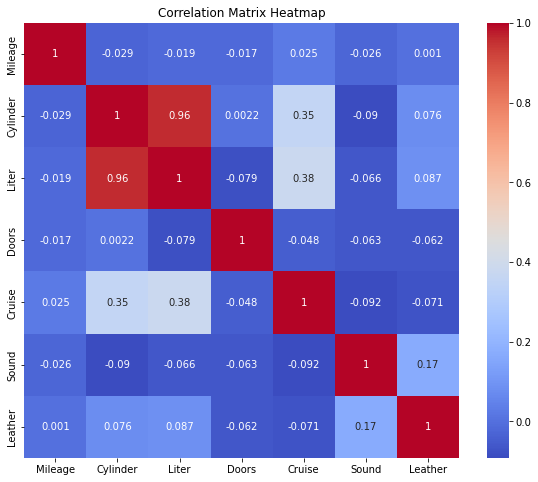

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
features = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make', 'Model', 'Type']]
price = df['Price']
correlation_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()